In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# Hold-out
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier

##### Decision Tree Visualization ###
from sklearn import tree # export_graphviz() method
import pydotplus # viz stuff
from IPython.display import Image # viz stuff
####################################

######## Evaluation #######
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Optional: baseline comparison
from sklearn.dummy import DummyClassifier
###########################

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# cross-validation
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('words_glasgow.csv')

In [ ]:
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


In [ ]:
df = df.fillna(0)
df.isna().any()

word               False
length             False
arousal            False
valence            False
dominance          False
concreteness       False
imageability       False
familiarity        False
aoa                False
semsize            False
gender             False
polysemy           False
web_corpus_freq    False
dtype: bool

In [ ]:
df1 = [df['dominance'],df['arousal'],df['valence'],df['web_corpus_freq'], df['gender'],df['polysemy']]
newdf=pd.DataFrame(df1).transpose()
newdf

,dominance,arousal,valence,web_corpus_freq,gender,polysemy
0,4.333,4.200,2.864,160074.0,5.391,0.0
1,4.667,3.125,5.781,4224864.0,3.303,0.0
2,5.235,3.273,5.250,140105.0,3.971,0.0
3,4.419,4.194,3.767,124123.0,5.167,0.0
4,4.800,3.846,3.880,128143.0,4.571,0.0
...,...,...,...,...,...,...
4677,5.333,6.185,5.000,3192943.0,5.269,0.0
4678,4.567,4.031,4.182,30735412.0,4.172,0.0
4679,6.121,5.969,6.818,655010.0,3.452,0.0
4680,5.485,5.909,6.235,11589578.0,4.059,0.0


In [ ]:
#import os
#os.environ['PATH'] += os.pathsep + 'C:/Users/maria/Anaconda3/Library/bin/graphviz'

In [ ]:
# Hold-out

attributes = [col for col in newdf.columns if col != 'polysemy']
X = df[attributes].values
y = df['polysemy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [ ]:
len(newdf), X_train.shape[0], X_test.shape[0]

(4682, 3277, 1405)

In [ ]:
df.shape, X_train.shape, X_test.shape

((4682, 13), (3277, 5), (1405, 5))

In [ ]:
newdf.shape, X_train.shape, X_test.shape

((4682, 6), (3277, 5), (1405, 5))

# Decision Tree with target variable "polysemy"

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=None ,
                             min_samples_split=20,
                             min_samples_leaf=10,
                            )

clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=20)

In [ ]:
clf.feature_importances_

array([0.21357188, 0.14205935, 0.21641591, 0.34314478, 0.08480808])

In [ ]:
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(attributes)}
imp_dict

{'dominance': 0.21357188203226501,
 'arousal': 0.1420593469670172,
 'valence': 0.2164159136019633,
 'web_corpus_freq': 0.34314477570759677,
 'gender': 0.08480808169115772}

In [ ]:
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'web_corpus_freq': 0.34314477570759677,
 'valence': 0.2164159136019633,
 'dominance': 0.21357188203226501,
 'arousal': 0.1420593469670172,
 'gender': 0.08480808169115772}

In [ ]:
clf.classes_

array([0, 1])

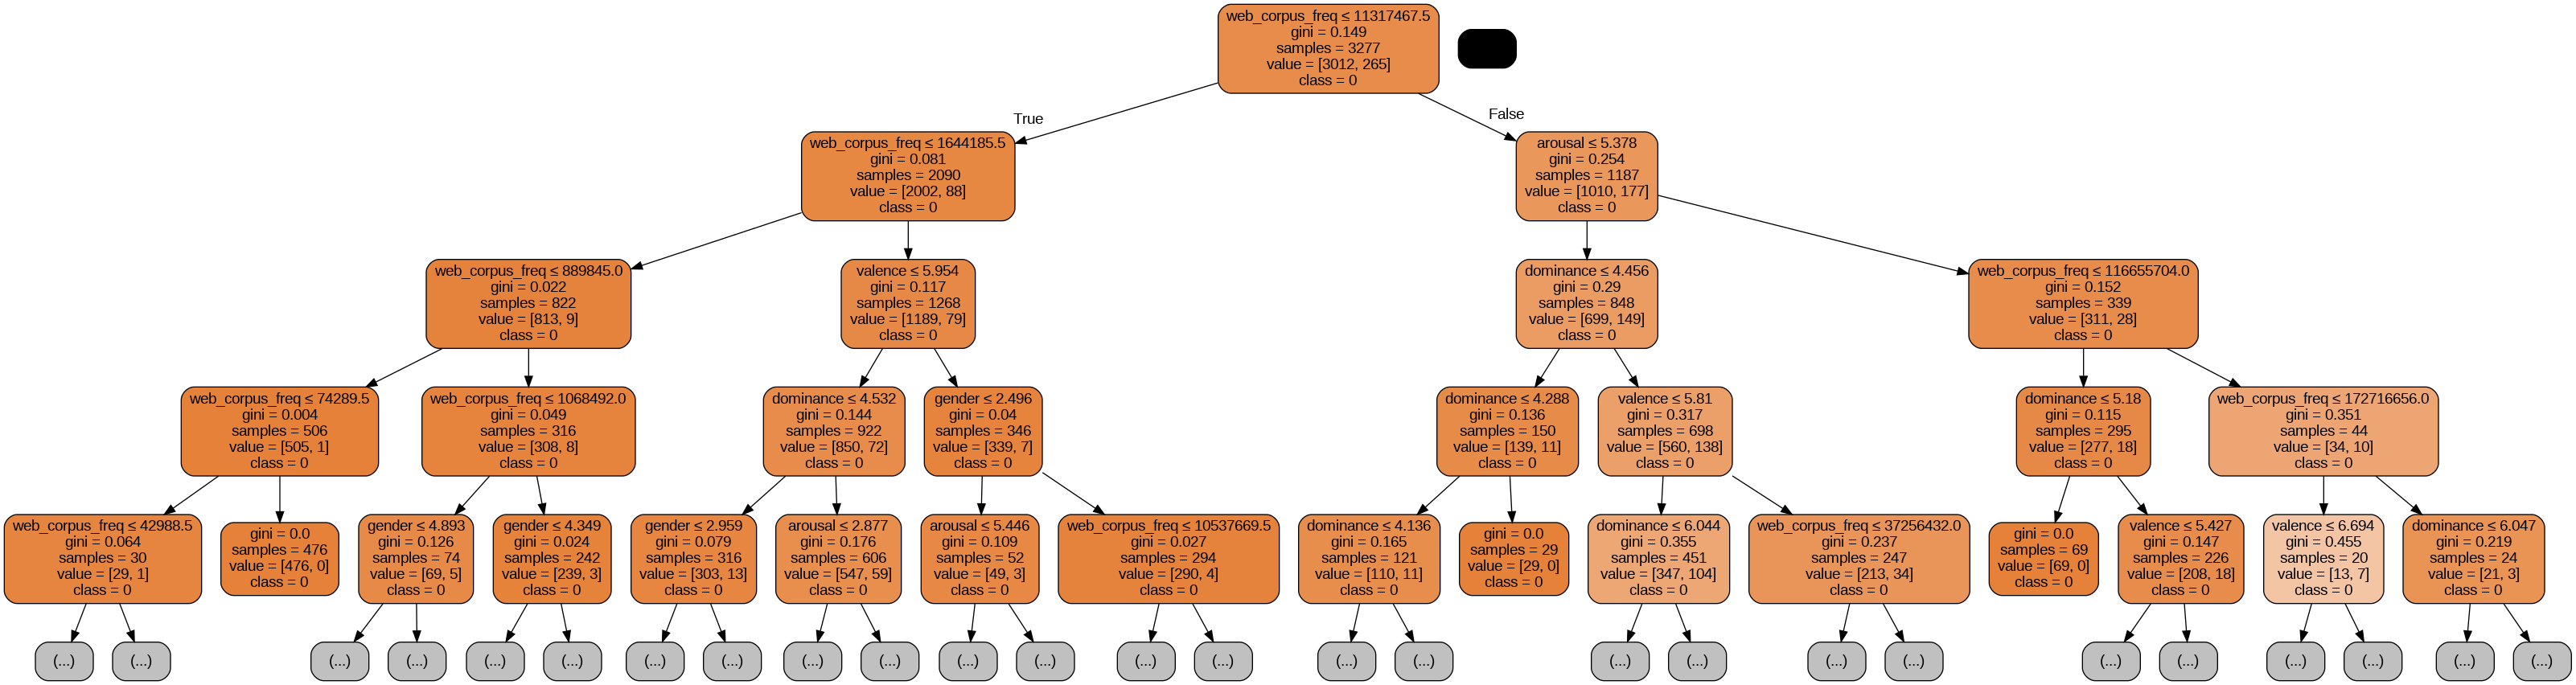

In [ ]:
dot_data = tree.export_graphviz (clf, out_file=None,
                                feature_names=attributes,
                                class_names=[str(v) for v in clf.classes_],
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=4)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

La classificazione tilizzando "Polysemy" come target variable non risulta ottimale. Proviamo ad utilizzare come target variable "Gender" trasformata in binaria:

# Decision Tree with target variable "Gender"

In [ ]:
df2= [df['length'],df['arousal'],df['imageability'],df['aoa'], df['gender'].astype(int),df['polysemy']]
newdfint = pd.DataFrame(df2).transpose()
newdfint

,length,arousal,imageability,aoa,gender,polysemy
0,8.0,4.200,4.391,6.760,5.0,0.0
1,5.0,3.125,5.344,5.177,3.0,0.0
2,10.0,3.273,3.177,5.543,3.0,0.0
3,8.0,4.194,2.516,6.233,5.0,0.0
4,10.0,3.846,2.571,6.407,4.0,0.0
...,...,...,...,...,...,...
4677,8.0,6.185,6.185,6.036,5.0,0.0
4678,4.0,4.031,3.903,2.636,4.0,0.0
4679,4.0,5.969,4.033,5.364,3.0,0.0
4680,3.0,5.909,6.441,2.324,4.0,0.0


In [ ]:
newdfint['gender']

0       5.0
1       3.0
2       3.0
3       5.0
4       4.0
       ... 
4677    5.0
4678    4.0
4679    3.0
4680    4.0
4681    3.0
Name: gender, Length: 4682, dtype: float64

In [ ]:
newdfint.describe()

,length,arousal,imageability,aoa,gender,polysemy
count,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000
mean,6.348355,4.678129,4.723018,4.143427,3.611064,0.080948
std,2.006230,1.097163,1.363110,1.252770,0.952262,0.272785
min,2.000000,2.057000,1.737000,1.219000,1.000000,0.000000
25%,5.000000,3.849000,3.519250,3.114000,3.000000,0.000000
50%,6.000000,4.571000,4.677000,4.177000,4.000000,0.000000
75%,8.000000,5.419000,6.032000,5.152000,4.000000,0.000000
max,16.000000,8.177000,6.941000,6.971000,6.000000,1.000000


In [ ]:
newdfint['gender']

0       5.0
1       3.0
2       3.0
3       5.0
4       4.0
       ... 
4677    5.0
4678    4.0
4679    3.0
4680    4.0
4681    3.0
Name: gender, Length: 4682, dtype: float64

In [ ]:
df['gender'].values[:4]

array([5.391, 3.303, 3.971, 5.167])

In [ ]:
df['maschile']=df['gender']>=4

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['maschile'] = le.fit_transform(df['maschile'])
df['maschile'].values[:5]

array([1, 0, 0, 1, 1])

In [ ]:
df

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,maschile
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0,1
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0,0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0,0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0,1
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0,1
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0,1
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0,0
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0,1


In [ ]:
provadf=[df['valence'],df['aoa'],df['imageability'],df['polysemy'], df['maschile'],df['semsize']]
provadf2=pd.DataFrame(provadf).transpose()
provadf2

,valence,aoa,imageability,polysemy,maschile,semsize
0,2.864,6.760,4.391,0.0,1.0,4.652
1,5.781,5.177,5.344,0.0,0.0,5.121
2,5.250,5.543,3.177,0.0,0.0,2.667
3,3.767,6.233,2.516,0.0,1.0,4.679
4,3.880,6.407,2.571,0.0,1.0,5.083
...,...,...,...,...,...,...
4677,5.000,6.036,6.185,0.0,1.0,5.464
4678,4.182,2.636,3.903,0.0,1.0,1.758
4679,6.818,5.364,4.033,0.0,0.0,2.636
4680,6.235,2.324,6.441,0.0,1.0,4.844


In [ ]:
# Hold-out

attributes = [col for col in provadf2.columns if col != 'maschile']
X = df[attributes].values
y = df['maschile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [ ]:
print(f"Elementi in df3: \t\t{len(df2)}")
print(f"Elementi in Train_set: \t{X_train.shape[0]}")
print(f"Elementi in Test_set: \t{X_test.shape[0]}")

Elementi in df3: 		6
Elementi in Train_set: 	3277
Elementi in Test_set: 	1405


In [ ]:
clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=None ,
                             min_samples_split=10,
                             min_samples_leaf=5,
                            )

clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10)

In [ ]:
clf.feature_importances_

array([0.42561691, 0.17757421, 0.17667946, 0.00544709, 0.21468233])

In [ ]:
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(attributes)}
imp_dict

{'valence': 0.4256169072438205,
 'aoa': 0.17757421468429,
 'imageability': 0.17667945837039212,
 'polysemy': 0.005447089759222364,
 'semsize': 0.21468232994227504}

In [ ]:
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'valence': 0.4256169072438205,
 'semsize': 0.21468232994227504,
 'aoa': 0.17757421468429,
 'imageability': 0.17667945837039212,
 'polysemy': 0.005447089759222364}

In [ ]:
clf.classes_

array([0, 1])

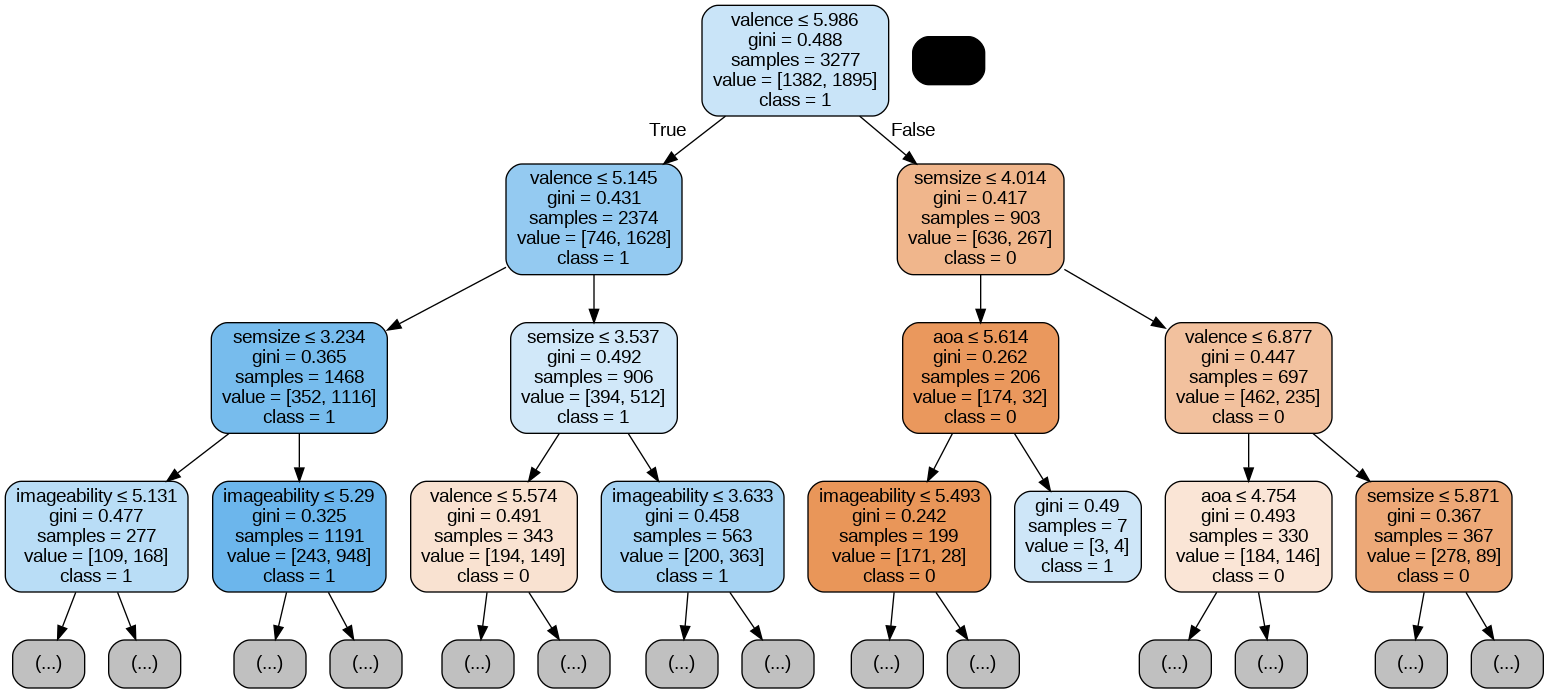

In [ ]:
dot_data = tree.export_graphviz (clf, out_file=None,
                                feature_names=attributes,
                                class_names=[str(v) for v in clf.classes_],
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
y_pred[:5]

array([0, 1, 1, 1, 1])

In [ ]:
y_train.values[:5]

array([1, 1, 1, 1, 0])

In [ ]:
print('Accuracy', accuracy_score(y_train, y_pred))
print('F1', f1_score(y_train, y_pred, average=None))

Accuracy 0.8526090936832469
F1 [0.82519001 0.87259298]


In [ ]:
print( classification_report(y_train, y_pred) )

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1382
           1       0.87      0.87      0.87      1895

    accuracy                           0.85      3277
   macro avg       0.85      0.85      0.85      3277
weighted avg       0.85      0.85      0.85      3277



In [ ]:
cf = confusion_matrix(y_train, y_pred, labels=[True,False])
cf

array([[1654,  241],
       [ 242, 1140]])

In [ ]:
# TP, FN, FP, TN
cf[0][0], cf[0][1], cf[1][0], cf[1][1]

(1654, 241, 242, 1140)

In [ ]:
cf = confusion_matrix(y_train, y_pred, labels=[1,0], normalize='all')
cf

array([[0.50472994, 0.07354287],
       [0.07384803, 0.34787916]])

In [ ]:
y_score = clf.predict_proba(X_test)
y_score[:6]

array([[0.8       , 0.2       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.6       , 0.4       ],
       [0.6       , 0.4       ]])

In [ ]:
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6815743326352182


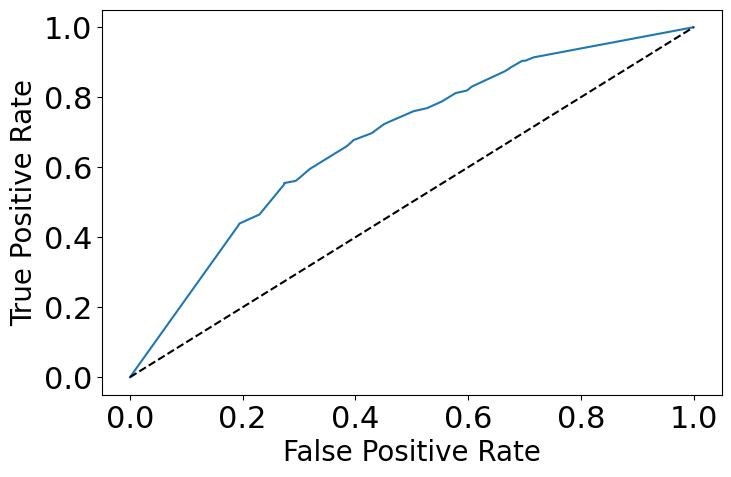

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [ ]:
dummy_clf = DummyClassifier(strategy='constant', constant=1)
dummy_clf.fit(X_test, y_test)

y_pred = dummy_clf.predict(X_test)

In [ ]:
cf = confusion_matrix(y_test, y_pred, labels=[True,False])
cf

array([[813,   0],
       [592,   0]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       592
           1       0.58      1.00      0.73       813

    accuracy                           0.58      1405
   macro avg       0.29      0.50      0.37      1405
weighted avg       0.33      0.58      0.42      1405



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
param_list = {'max_depth': [None] + [2, 3, 4],
             'min_samples_split': [2, 5, 10, 20],
             'min_samples_leaf': [1, 5, 10, 20]
             }

grid_search = GridSearchCV(clf, param_grid=param_list, scoring='f1')
grid_search.fit(X, y)

res = grid_search.cv_results_

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(res, n_top=3)

Model with rank: 1
Mean validation score: 0.753 (std: 0.017)
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.753 (std: 0.017)
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}

Model with rank: 1
Mean validation score: 0.753 (std: 0.017)
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.753 (std: 0.017)
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 20}

Model with rank: 1
Mean validation score: 0.753 (std: 0.017)
Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.753 (std: 0.017)
Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}

Model with rank: 1
Mean validation score: 0.753 (std: 0.017)
Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10}

Model with rank: 1
Mean validat

In [ ]:
scores = cross_val_score(clf, X, y, cv=10, scoring='f1')

scores.mean(), scores.std()

(0.6756450949365707, 0.021945273463369663)

## Some classification reports

In [ ]:
clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(X_train,y_train)
y_pred2 =clf2.predict(X_test)

clf3=RandomForestClassifier(n_estimators=100)
clf3.fit(X_train,y_train)
y_pred3=clf3.predict(X_test)

print("Accuracy DT:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy KNN:",metrics.accuracy_score(y_test, y_pred2))
print("Accuracy RF: ",metrics.accuracy_score(y_test, y_pred3),"\n")

scores = cross_val_score(clf, X, y, cv=10, scoring='f1')
scores2 = cross_val_score(clf2, X, y, cv=10, scoring='f1')
scores3 = cross_val_score(clf3, X, y, cv=10, scoring='f1')

print("Media Val Score DT: ", scores.mean())
print("Media Val Score KNN:", scores2.mean())
print("Media Val Score RF: ", scores3.mean())

Accuracy DT: 0.5786476868327403
Accuracy KNN: 0.6775800711743772
Accuracy RF:  0.695373665480427 

Media Val Score DT:  0.6762973458587951
Media Val Score KNN: 0.7298677949742516
Media Val Score RF:  0.7436471627539062


In [ ]:
# CLASSIFICATION REPORT KNN

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       592
           1       0.71      0.75      0.73       813

    accuracy                           0.68      1405
   macro avg       0.67      0.66      0.66      1405
weighted avg       0.67      0.68      0.68      1405



In [ ]:
# CLASSIFICATION REPORT RANDOM FOREST

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       592
           1       0.72      0.78      0.75       813

    accuracy                           0.70      1405
   macro avg       0.69      0.68      0.68      1405
weighted avg       0.69      0.70      0.69      1405



In [ ]:
# CLASSIFICATION REPORT DECISION TREE

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       592
           1       0.58      1.00      0.73       813

    accuracy                           0.58      1405
   macro avg       0.29      0.50      0.37      1405
weighted avg       0.33      0.58      0.42      1405



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
